# SET UP

## CREANDO EL ENTORNO PARA EL PROYECTO

Creación del nuevo entorno e instalación los paquetes básicos (en terminal):

```
conda create --name retail python numpy pandas matplotlib seaborn scikit-learn scipy sqlalchemy xgboost jupyter
```

Activación el nuevo entorno:
```
conda activate retail
```

Instalación de los paquetes que están en otros canales:
```
conda install -c conda-forge pyjanitor scikit-plot yellowbrick imbalanced-learn jupyter_contrib_nbextensions cloudpickle

conda install -c districtdatalabs yellowbrick

pip install category_encoders
```
Creación del `environment.yml`
```
conda env export > retail.yml
```

## IMPORTACIÓN DE PAQUETES

In [5]:
import os
import numpy as np
import pandas as pd

#Automcompletar rápido
%config IPCompleter.greedy=True

## CREACIÓN DEL DIRECTORIO DEL PROYECTO

### Directorio raiz

In [12]:
raiz = 'C:/Users/pedro/PEDRO/DS/Portfolio/'

### Nombre del proyecto

In [13]:
nombre_dir = '02_RETAIL'

### Creación del directorio y la estructura del proyecto

In [14]:
path = raiz + nombre_dir

In [ ]:
try:
    os.mkdir(path)
    os.mkdir(path + '/01_Documentos')
    os.mkdir(path + '/02_Datos')
    os.mkdir(path + '/02_Datos/01_Originales')
    os.mkdir(path + '/02_Datos/02_Validacion')
    os.mkdir(path + '/02_Datos/03_Trabajo')
    os.mkdir(path + '/02_Datos/04_Caches')
    os.mkdir(path + '/03_Notebooks')
    os.mkdir(path + '/03_Notebooks/01_Funciones')
    os.mkdir(path + '/03_Notebooks/02_Desarrollo')
    os.mkdir(path + '/03_Notebooks/03_Sistema')
    os.mkdir(path + '/04_Modelos')
    os.mkdir(path + '/05_Resultados')
    os.mkdir(path + '/09_Otros')
    
except OSError:
    print ("La creación del directorio %s ha fallado" % path)
else:
    print ("Se ha creado satisfactoriamente el directorio %s " % path)

In [15]:
os.chdir(path)

### environment.yml

Archivo `retail.yml` movido a la carpeta /01_Documentos'

## CREACIÓN DE LOS DATASETS INICIALES

Datos originales movidos a la carpeta '/02_Datos/01_Originales'

### Importación de datos

In [18]:
nombre_fichero_datos = 'hipermercado.db'
ruta_completa = path + '/02_Datos/01_Originales/' + nombre_fichero_datos

Carga de datos.

In [19]:
import sqlalchemy as sa

In [20]:
con = sa.create_engine('sqlite:///' + ruta_completa)

In [21]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['calendar', 'sales', 'sell_prices']

In [23]:
cal = pd.read_sql('calendar', con)
cal.drop(columns='index',inplace=True)
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2
0,2013-01-01,11249,Tuesday,4,1,2013,d_704,NewYear,National,None,None
1,2013-01-02,11249,Wednesday,5,1,2013,d_705,None,None,None,None
2,2013-01-03,11249,Thursday,6,1,2013,d_706,None,None,None,None
3,2013-01-04,11249,Friday,7,1,2013,d_707,None,None,None,None
4,2013-01-05,11250,Saturday,1,1,2013,d_708,None,None,None,None


In [24]:
sales = pd.read_sql('sales', con)
sales.drop(columns='index',inplace=True)
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_704,d_705,d_706,d_707,...,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798
0,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,0,224,241,232,...,5,2,0,0,6,0,6,0,0,0
1,FOODS_3_120_CA_3_validation,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,54,63,44,0,65,90,104,73,76,97
2,FOODS_3_202_CA_3_validation,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,20,23,23,25,...,43,40,39,0,29,33,27,13,26,47
3,FOODS_3_252_CA_3_validation,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,34,27,40,49,...,31,43,32,0,52,37,32,29,34,27
4,FOODS_3_288_CA_3_validation,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,29,45,28,0,46,36,40,31,46,36


In [25]:
prices = pd.read_sql('sell_prices', con)
prices.drop(columns='index',inplace=True)
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_3,FOODS_3_090,11249,1.25
1,CA_3,FOODS_3_090,11250,1.25
2,CA_3,FOODS_3_090,11251,1.25
3,CA_3,FOODS_3_090,11252,1.25
4,CA_3,FOODS_3_090,11301,1.38


## CREACIÓN DEL TABLON ANALÍTICO

### Relaciones entre las tablas

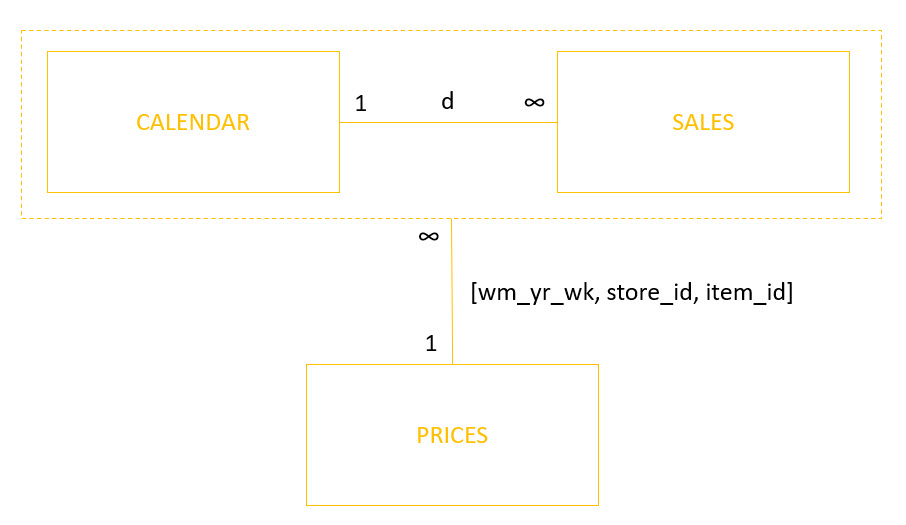

In [40]:
from IPython import display
display.Image("../../99_Media/CasoRetail_EstructuraRelaciones.jpg")

NOTAS:

* Primero unir cal con sales, ya que para unir prices necesitamos campos de ambas.
* Para unir cal con sales primero hay que modificar sales, para pasar la variable d a filas.

### Unión de cal con sales

#### Transformando la estructura de sales

In [26]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_704,d_705,d_706,d_707,...,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798
0,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,0,224,241,232,...,5,2,0,0,6,0,6,0,0,0
1,FOODS_3_120_CA_3_validation,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,54,63,44,0,65,90,104,73,76,97
2,FOODS_3_202_CA_3_validation,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,20,23,23,25,...,43,40,39,0,29,33,27,13,26,47
3,FOODS_3_252_CA_3_validation,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,34,27,40,49,...,31,43,32,0,52,37,32,29,34,27
4,FOODS_3_288_CA_3_validation,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,29,45,28,0,46,36,40,31,46,36


In [27]:
sales = sales.melt(id_vars = sales.columns[0:6],
                   var_name = 'd',
                   value_name = 'ventas')
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d,ventas
0,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,d_704,0
1,FOODS_3_120_CA_3_validation,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,d_704,0
2,FOODS_3_202_CA_3_validation,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,d_704,20
3,FOODS_3_252_CA_3_validation,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,d_704,34
4,FOODS_3_288_CA_3_validation,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,d_704,0
...,...,...,...,...,...,...,...,...
21895,FOODS_3_329_CA_4_validation,FOODS_3_329,FOODS_3,FOODS,CA_4,CA,d_1798,6
21896,FOODS_3_555_CA_4_validation,FOODS_3_555,FOODS_3,FOODS,CA_4,CA,d_1798,5
21897,FOODS_3_586_CA_4_validation,FOODS_3_586,FOODS_3,FOODS,CA_4,CA,d_1798,11
21898,FOODS_3_587_CA_4_validation,FOODS_3_587,FOODS_3,FOODS,CA_4,CA,d_1798,16


Eliminamos la variable id que ya no aporta nada.

In [28]:
sales.drop(columns='id',inplace=True)

#### Cruce con calendar para incorporar su información

In [29]:
df = sales.merge(right = cal, how = 'left', on = 'd')
df.head()

,item_id,dept_id,cat_id,store_id,state_id,d,ventas,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2
0,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None
1,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None
2,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,d_704,20,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None
3,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,d_704,34,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None
4,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None


### Incorporación de prices

In [45]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_3,FOODS_3_090,11249,1.25
1,CA_3,FOODS_3_090,11250,1.25
2,CA_3,FOODS_3_090,11251,1.25
3,CA_3,FOODS_3_090,11252,1.25
4,CA_3,FOODS_3_090,11301,1.38


In [31]:
df = df.merge(right = prices, how = 'left', on = ['store_id','item_id','wm_yr_wk'])
df

,item_id,dept_id,cat_id,store_id,state_id,d,ventas,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
0,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,1.25
1,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,4.98
2,FOODS_3_202,FOODS_3,FOODS,CA_3,CA,d_704,20,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,4.28
3,FOODS_3_252,FOODS_3,FOODS,CA_3,CA,d_704,34,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,1.48
4,FOODS_3_288,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,FOODS_3_329,FOODS_3,FOODS,CA_4,CA,d_1798,6,2015-12-31,11548,Thursday,6,12,2015,None,None,None,None,2.98
21896,FOODS_3_555,FOODS_3,FOODS,CA_4,CA,d_1798,5,2015-12-31,11548,Thursday,6,12,2015,None,None,None,None,1.68
21897,FOODS_3_586,FOODS_3,FOODS,CA_4,CA,d_1798,11,2015-12-31,11548,Thursday,6,12,2015,None,None,None,None,1.68
21898,FOODS_3_587,FOODS_3,FOODS,CA_4,CA,d_1798,16,2015-12-31,11548,Thursday,6,12,2015,None,None,None,None,2.48


Comprobamos.

In [32]:
df[['store_id','item_id','wm_yr_wk','d','sell_price']]\
    .sort_values(by = ['store_id','item_id','wm_yr_wk','d'])\
    .head(10)

,store_id,item_id,wm_yr_wk,d,sell_price
0,CA_3,FOODS_3_090,11249,d_704,1.25
20,CA_3,FOODS_3_090,11249,d_705,1.25
40,CA_3,FOODS_3_090,11249,d_706,1.25
60,CA_3,FOODS_3_090,11249,d_707,1.25
80,CA_3,FOODS_3_090,11250,d_708,1.25
100,CA_3,FOODS_3_090,11250,d_709,1.25
120,CA_3,FOODS_3_090,11250,d_710,1.25
140,CA_3,FOODS_3_090,11250,d_711,1.25
160,CA_3,FOODS_3_090,11250,d_712,1.25
180,CA_3,FOODS_3_090,11250,d_713,1.25


### Reordenar y poner date como index

In [33]:
df.head(1)

,item_id,dept_id,cat_id,store_id,state_id,d,ventas,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
0,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,d_704,0,2013-01-01,11249,Tuesday,4,1,2013,NewYear,National,None,None,1.25


In [34]:
orden = ['date',
         'state_id',
         'store_id',
         'dept_id',
         'cat_id',
         'item_id',
         'wm_yr_wk',
         'd',
         'ventas',
         'sell_price',
         'year',
         'month',
         'wday',
         'weekday',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2']

In [35]:
df = df[orden].set_index('date')
df

,state_id,store_id,dept_id,cat_id,item_id,wm_yr_wk,d,ventas,sell_price,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,,,,,,,
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_090,11249,d_704,0,1.25,2013,1,4,Tuesday,NewYear,National,None,None
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_120,11249,d_704,0,4.98,2013,1,4,Tuesday,NewYear,National,None,None
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_202,11249,d_704,20,4.28,2013,1,4,Tuesday,NewYear,National,None,None
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_252,11249,d_704,34,1.48,2013,1,4,Tuesday,NewYear,National,None,None
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_288,11249,d_704,0,NaN,2013,1,4,Tuesday,NewYear,National,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,CA,CA_4,FOODS_3,FOODS,FOODS_3_329,11548,d_1798,6,2.98,2015,12,6,Thursday,None,None,None,None
2015-12-31,CA,CA_4,FOODS_3,FOODS,FOODS_3_555,11548,d_1798,5,1.68,2015,12,6,Thursday,None,None,None,None
2015-12-31,CA,CA_4,FOODS_3,FOODS,FOODS_3_586,11548,d_1798,11,1.68,2015,12,6,Thursday,None,None,None,None


### Extracción y reserva del dataset de validación

Dado que es un problema de forecasting no podemos extraer el dataset de validación de forma aleatoria.

Si no que este estará compuesto por los últimos datos disponibles.

In [44]:
val = df['2015-12-01':'2015-12-31']

df = df[:'2015-11-31']

In [48]:
nombre_fichero_validacion = 'validacion.csv'

ruta_completa = path + '/02_Datos/02_Validacion/' + nombre_fichero_validacion

val.to_csv(ruta_completa)

### Extrayendo y guardando el dataset de trabajo

In [57]:
trabajo = df

In [53]:
nombre_fichero_trabajo = 'trabajo.csv'

ruta_completa = path + '/02_Datos/03_Trabajo/' + nombre_fichero_trabajo

df.to_csv(ruta_completa)